In [845]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [846]:
df = pd.read_csv("./fish.csv")

In [847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [848]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [849]:
df.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [850]:
df.isna().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

In [851]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [852]:
mask = (df['Species']=="Bream") | (df['Species']=="Smelt")
df = df[mask]
df.reset_index(drop=True, inplace=True)

In [853]:
new_df = df[df.columns[:3]]
new_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


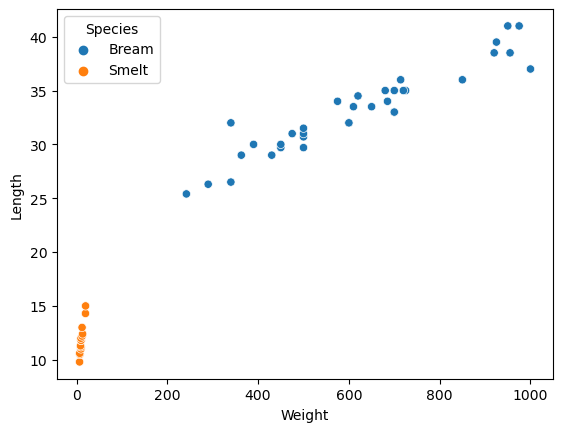

In [854]:
sns.scatterplot(data=new_df, x='Weight', y="Length", hue='Species')
plt.show() # scatterplot으로 데이터가 분류될 수 있을만한 데이터 인것을 확인.

In [855]:
# scaling
feature_data = new_df[new_df.columns[1:]]
target_data = new_df.Species

In [856]:
train_x, test_x, train_y, test_y = train_test_split(feature_data, target_data, stratify=target_data, random_state=10)

In [857]:
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

In [858]:
scaler=StandardScaler()

In [859]:
scaler.fit(train_x)
scaler.fit(test_x)


StandardScaler()

In [860]:
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [861]:
train_x_scaled.shape

(36, 2)

In [862]:
test_x_scaled.shape

(13, 2)

In [863]:
kncModel=KNeighborsClassifier()

In [864]:
kncModel.fit(train_x_scaled, train_y)

KNeighborsClassifier()

In [865]:
kncModel.classes_

array(['Bream', 'Smelt'], dtype=object)

In [866]:
train_y.reset_index(drop=True, inplace=True)

In [867]:
train_x_scaled

array([[-1.33936795, -1.66538658],
       [-0.21737737,  0.31348453],
       [ 1.56820638,  0.99923195],
       [-1.3197558 , -1.4106804 ],
       [-0.51009602, -0.04898196],
       [ 1.34866739,  1.24414174],
       [-1.33848979, -1.58701545],
       [-1.33351357, -1.51844071],
       [-1.33029367, -1.5282371 ],
       [-0.04174618,  0.31348453],
       [ 0.64614264,  0.7053402 ],
       [ 0.10461314,  0.46043041],
       [ 0.54369111,  0.65635824],
       [-0.36373669, -0.02938918],
       [-1.33058639, -1.54782988],
       [ 0.74859416,  0.80330412],
       [-1.33029367, -1.44986597],
       [-0.04174618,  0.28409536],
       [-0.29641141,  0.21552062],
       [ 0.42660365,  0.65635824],
       [ 0.63150671,  0.80330412],
       [-0.10028991,  0.21552062],
       [ 0.69005044,  0.80330412],
       [-1.30072908, -1.15597422],
       [-1.33000095, -1.46945875],
       [ 0.10461314,  0.28409536],
       [ 0.32415213,  0.7053402 ],
       [ 0.45587552,  0.75432216],
       [-1.32326842,

In [868]:
train_score=kncModel.score(train_x_scaled, train_y)
test_score=kncModel.score(test_x_scaled, test_y)

f'훈련 데이터 : {train_score}  테스트 데이터 : {test_score}'

'훈련 데이터 : 1.0  테스트 데이터 : 1.0'

In [869]:
new_data = pd.DataFrame([[48,27]], columns=feature_data.columns)

In [870]:
new_data = scaler.transform(new_data)
new_data = pd.DataFrame(new_data, columns=feature_data.columns)
new_data

,Weight,Length
0,-1.218475,0.019593


In [871]:
pre_target = kncModel.predict(new_data)
pre_target

c:\Users\KDP-23\anaconda3\envs\My_PYTHON\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [872]:
kncModel.predict_proba(new_data)

c:\Users\KDP-23\anaconda3\envs\My_PYTHON\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.]])

In [873]:
distance_, k_idx = kncModel.kneighbors(new_data)

c:\Users\KDP-23\anaconda3\envs\My_PYTHON\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [874]:
distance_, k_idx


(array([[0.71169058, 0.85614079, 0.94265012, 0.98514011, 1.04334515]]),
 array([[ 4, 13, 18, 34,  1]], dtype=int64))

In [875]:
train_x_scaled = pd.DataFrame(train_x_scaled, columns=feature_data.columns)

final = train_x_scaled.iloc[k_idx.reshape(-1)]

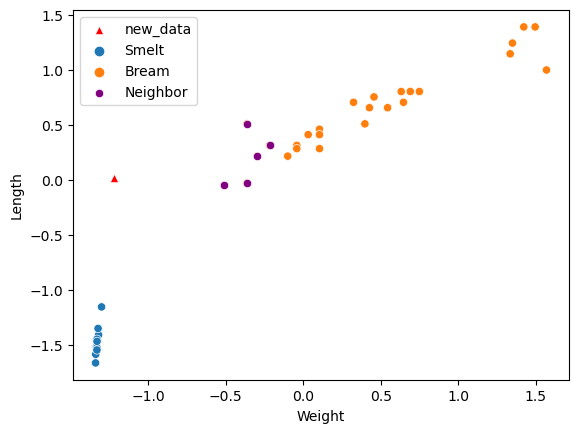

In [876]:
sns.scatterplot(data=new_data, x='Weight', y='Length', color='red', marker='^',label='new_data')
sns.scatterplot(data=train_x_scaled, x='Weight', y='Length', color='blue', hue=train_y)
sns.scatterplot(data=final, x='Weight', y='Length', color='purple',label='Neighbor')

plt.show()